In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [52]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5004,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
6225,1452-UZOSF,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),106.10,7548.6,No
4185,8620-RJPZN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.70,20.7,No
346,2034-GDRCN,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.40,168.2,Yes
2248,9554-DFKIC,Male,0,Yes,Yes,30,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.45,1588.7,No


In [5]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
# this dataframe will show u the null values in the TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape
# so 11 rows are null

(11, 20)

In [12]:
df.iloc[488]['TotalCharges'] # as we can see the row 488 is null ' '

' '

In [13]:
df1  = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-14-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [15]:
df1.TotalCharges.dtypes

dtype('float64')

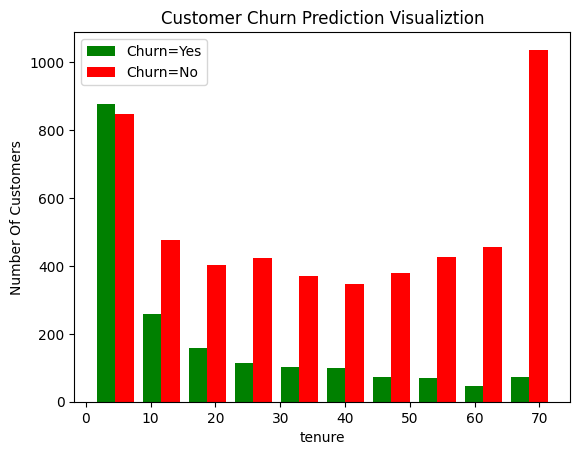

In [16]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no],  color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [17]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
                # calling this function will be printing unique values for all your categorical columns

In [18]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-19-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-19-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
#as we know machine learning doesnt understand text best way to convert it to 0 and 1
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-21-4eeaf0dc6ca4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [22]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


<ipython-input-23-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [24]:
df1.gender.unique()


array([1, 0])

In [25]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1461,0,0,1,0,22,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
13,0,0,0,0,49,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
4461,0,0,0,0,29,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
881,0,1,0,0,26,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3875,0,1,1,1,41,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [28]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  #converting values into range between 0 and 1
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [29]:
df2.sample(5) # as we can see the samples are converted into range between 0s and 1s

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6019,1,0,0,0,0.563380,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4791,0,0,1,0,0.028169,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5523,1,0,1,0,0.084507,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4551,0,0,1,1,0.774648,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4307,1,1,0,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [31]:
# now my data frame is ready to be used

In [32]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [33]:
from sklearn.model_selection import train_test_split # spliting our dataset into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
# we used 80% as train and 20% as a test samples

In [34]:
X_train.shape

(5625, 26)

In [35]:
X_test.shape

(1407, 26)

In [36]:
len(X_train.columns) # 26 columns as a training and 1 column was dropped

26

In [37]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,),activation='relu'),
    # keras.layer.Dense(15,activation='relu'), no need for a one more dense layer since we have 1 inpurt layer and there as 1 hidden layer and an output layer
    keras.layers.Dense(1,activation='sigmoid'),

])
model.compile(optimizer='adam', # learning rate of adam is 0.01
              loss='binary_crossentropy', # beacuse our output is binary 0 and 1
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5209 - accuracy: 0.7404
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7916
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.7984
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8016
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8027
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8057
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8032
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4100 - accura

In [38]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.7825


[0.4483497142791748, 0.7825160026550293]

In [39]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.15507914],
       [0.48490828],
       [0.01063403],
       [0.66510844],
       [0.4674621 ]], dtype=float32)

In [40]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [43]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

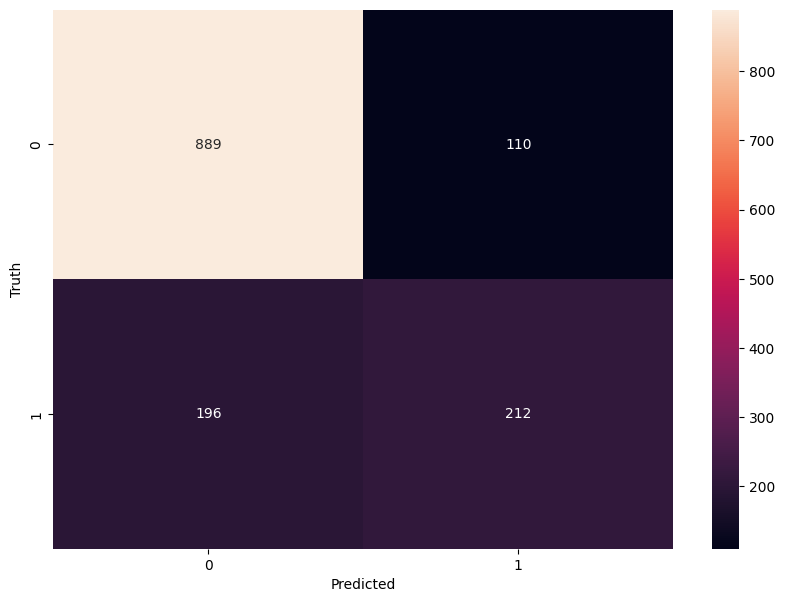

In [44]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#879 + 223 our model got it correct
#185 + 120 our model got an error

In [45]:
round((879+223)/(879+223+185+120),2) # Accuracy is 0.78

0.78

In [46]:
round(879/(879+223),2) #Precision for 0 class

0.8

In [47]:
round(223/(223+120),2) #precison for 1 class

0.65

In [48]:
round(879/(879+120),2) # recall for 0 class

0.88

In [49]:
round(223/(223+185),2) # recall for 1 class

0.55

In [55]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.3 MB/s eta 0:00:00


In [56]:
from tensorflow_addons import losses

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [57]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [58]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [59]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.4932 - accuracy: 0.7424
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.7966
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4173 - accuracy: 0.7995
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4138 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8071
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4101 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4092 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4085 - accuracy: 0.8046
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4075 - accuracy: 0.8064
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4055 - accura

In [60]:
#Method 1: Undersampling

In [61]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [62]:
df_class_0.shape #we can see the imbalanced this class has 5163

(5163, 27)

In [63]:
df_class_1.shape # and this class has 1869

(1869, 27)

In [68]:
#now we will undersample the dataset
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0) #concat the 2 classes with pandas
#df_test_under.shape -->  1869 + 1869 = 3738

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [65]:
count_class_0, count_class_1

(5163, 1869)

In [69]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y) # startify makes sure you have balanced samples


In [70]:
 #Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [71]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6380 - accuracy: 0.6485
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.7421
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7525
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4986 - accuracy: 0.7569
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4934 - accuracy: 0.7582
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.7605
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4840 - accuracy: 0.7619
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.7589
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.7642
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4776 - accuracy: 0.7676
Epoch 11/

In [72]:
#classification result we can see the recall and precision is fair

In [73]:
#Method2: Oversampling

In [75]:
count_class_0,count_class_1

(5163, 1869)

In [74]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape #5163 * 2 = 10326

(10326, 27)

In [76]:
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [77]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [78]:
# Number of classes in training Data
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [79]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [81]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 4s 6ms/step - loss: 0.5555 - accuracy: 0.7185
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4974 - accuracy: 0.7592
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4908 - accuracy: 0.7616
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4859 - accuracy: 0.7659
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.7663
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4774 - accuracy: 0.7692
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.7686
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4708 - accuracy: 0.7709
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4681 - accuracy: 0.7724
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4653 - accura

In [83]:
#compared to the original class we can see the improvment in precision , recall,f1-score after applying a fair treatment

In [84]:
#Method3: SMOTE

In [85]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [87]:
pip install imbalanced-learn

In [91]:
y.value_counts() # as we can see the data is imbalanced

0    5163
1    1869
Name: Churn, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [95]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [96]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.5288 - accuracy: 0.7429
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.7781
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4628 - accuracy: 0.7799
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4581 - accuracy: 0.7850
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4532 - accuracy: 0.7857
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4508 - accuracy: 0.7868
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4467 - accuracy: 0.7906
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.7930
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.7949
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4362 - accura

In [ ]:
#Method4: Use of Ensemble with undersampling

In [97]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [98]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [101]:
y_train.value_counts()
#model1 --> class1(1495) + class0(0, 1495)

#model2 --> class1(1495) + class0(1496, 2990)

#model3 --> class1(1495) + class0(2990, 4130)

0    4130
1    1495
Name: Churn, dtype: int64

In [102]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [103]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [104]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [105]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [106]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

X_train.shape

(2990, 26)

In [107]:

X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6015 - accuracy: 0.6816
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.7632
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7619
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4890 - accuracy: 0.7652
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4873 - accuracy: 0.7702
Epoch 6/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4825 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4802 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4770 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4760 - accuracy: 0.7716
Epoch 11/

In [108]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 7ms/step - loss: 0.5834 - accuracy: 0.7191
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5066 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4932 - accuracy: 0.7622
Epoch 4/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4866 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4824 - accuracy: 0.7605
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4791 - accuracy: 0.7699
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4776 - accuracy: 0.7615
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4755 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4712 - accuracy: 0.7706
Epoch 11/

In [109]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 2s 4ms/step - loss: 0.6858 - accuracy: 0.5734
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.7503
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7670
Epoch 4/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4833 - accuracy: 0.7734
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7769
Epoch 6/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4744 - accuracy: 0.7825
Epoch 7/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.7787
Epoch 8/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4696 - accuracy: 0.7837
Epoch 9/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4676 - accuracy: 0.7799
Epoch 10/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4643 - accuracy: 0.7818
Epoch 11/

In [110]:
len(y_pred1)

1407

In [111]:
len(y_pred2)

1407

In [112]:
len(y_pred3)

1407

In [113]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [114]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.79      0.71      0.72      1407

